In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.data.data_processing import DataProcessor
from kaggle_prediction_interval_birthweight.workflow.validation import Validator
from kaggle_prediction_interval_birthweight.workflow.histboost_tuning import (
    HistBoostTuner,
)

np.random.seed(1)
set_seed(1)

In [3]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].set_xlim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].set_ylim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()

In [4]:
data = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/train.csv")
data_test = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/test.csv")

In [5]:
data_processor = DataProcessor("HistBoostRegressor")
X, y = data_processor(data)

In [6]:
tuner = HistBoostTuner(
    verbose=True, categorical_feature_mask=data_processor.categorical_features
)
tuner.tune(X, y)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0003
Function value obtained: -0.2111
Current minimum: -0.2144
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 11.5222
Function value obtained: -0.2033
Current minimum: -0.2144
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 22.6705
Function value obtained: -0.2042
Current minimum: -0.2144
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 21.6272
Function value obtained: -0.2113
Current minimum: -0.2144
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.2031
Function value obtained: -0.1890
Current minimum: -0.2144
Iteration No: 6 start

In [7]:
tuner.res_gp.func_vals

array([-0.19476483, -0.21084902, -0.19296199, -0.20374554, -0.20260468,
       -0.20521543, -0.21441505, -0.21411501, -0.2090968 , -0.21109029,
       -0.20334403, -0.20420414, -0.21127472, -0.18900364, -0.20839991,
       -0.20182512, -0.20560546, -0.21389946, -0.20155675, -0.20837244,
       -0.08989705, -0.08991962, -0.20331567, -0.20314352, -0.20404321,
       -0.20403177, -0.20989481, -0.20778016, -0.20350304, -0.20471403,
       -0.21152739, -0.20425431, -0.21323009, -0.20815624, -0.20361187,
       -0.208985  , -0.20650383, -0.2038228 , -0.20449407, -0.19076247,
       -0.2038374 , -0.2133461 , -0.21103528, -0.21367589, -0.21301464,
       -0.21159014, -0.21402264, -0.21030031, -0.20390317, -0.20877187,
       -0.21251629, -0.1333573 , -0.20252111, -0.20034793, -0.21298359,
       -0.21369009, -0.2119634 , -0.18695382, -0.20427087, -0.21255655])

In [8]:
tuner.res_gp.x_iters

[[0.5932517736067934, 8.44265904315269, 9, 43, 128],
 [0.3849973255854072, 2.975353090098658, 2, 17, 101],
 [0.8123565600467179, 4.79977692397885, 5, 43, 74],
 [0.6485237001791461, 3.682421715990082, 10, 11, 175],
 [0.4741344372284369, 8.009109510688925, 6, 36, 147],
 [0.5824377722830322, 5.373736920757813, 8, 10, 100],
 [0.18714601098343323, 7.369184402107811, 3, 11, 72],
 [0.15052519231649952, 2.223221659301995, 4, 46, 95],
 [0.6134503944262484, 9.023486808254013, 2, 49, 134],
 [0.17173867555090913, 3.5815280881735814, 8, 32, 72],
 [0.9971876261279299, 9.325574267812996, 2, 50, 55],
 [0.3971841465687302, 3.879113532512664, 7, 47, 171],
 [0.3139602434153429, 5.245486350247119, 5, 15, 112],
 [0.9140480625546539, 4.572053507821804, 5, 47, 158],
 [0.716254545452396, 8.027577011798611, 2, 28, 174],
 [0.8293177604597747, 8.296035297908244, 3, 8, 137],
 [0.5934724527797589, 6.71654425768037, 5, 14, 65],
 [0.142978015339482, 7.833146893804137, 5, 7, 129],
 [0.660975094507765, 2.9849599625775

In [9]:
tuner.result

{'score': -0.21441505,
 'opt_parameters': {'learning_rate': 0.18714601098343323,
  'l2_regularization': 7.369184402107811,
  'max_depth': 3,
  'max_leaf_nodes': 11,
  'min_samples_leaf': 72}}

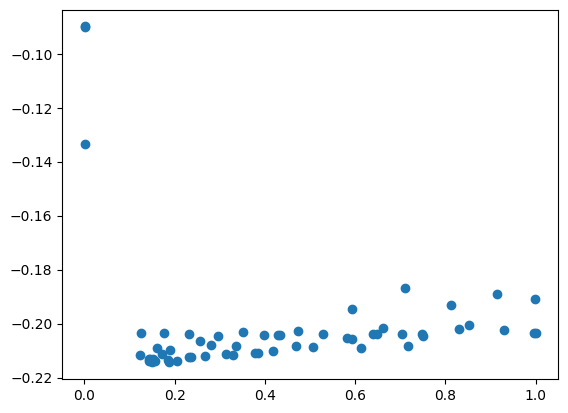

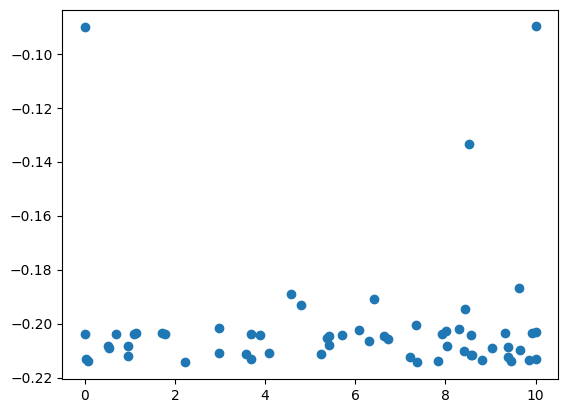

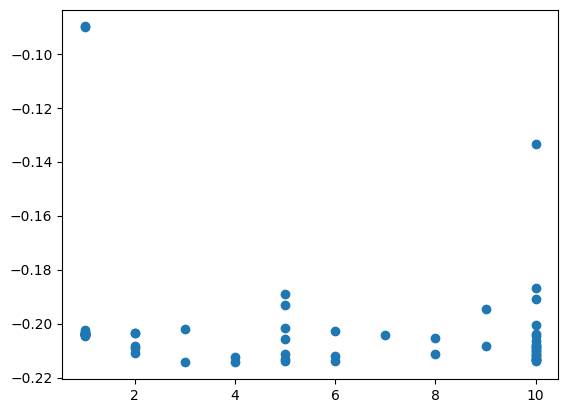

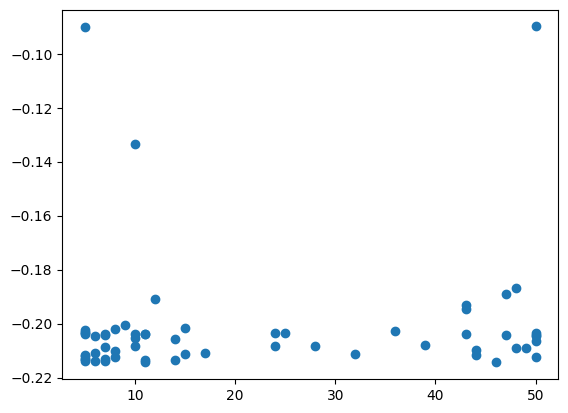

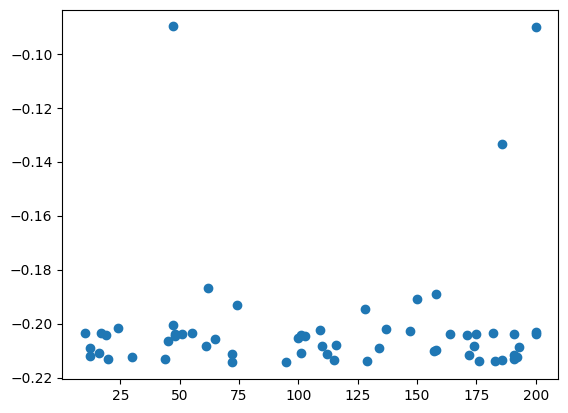

In [10]:
import matplotlib.pyplot as plt

for which_param in range(5):
    x = [i[which_param] for i in tuner.res_gp.x_iters]
    plt.scatter(x, tuner.res_gp.func_vals)
    plt.show()

In [11]:
# eim_validator = Validator("HistBoostRegressor")
# eim_validator.fit(data)
# eim_validator.print_performance_summary()

# lower, upper = eim_validator.predict_intervals(data)
# lower_new, upper_new = eim_validator.predict_intervals(data_test)

# plot_result(data["DBWT"], lower, upper, lower_new, upper_new)